# Import Packages, Define Parsing Functions 

In [1]:
%matplotlib inline
import numpy as np

#Import Matplotlib Functions
import matplotlib.pyplot as plt
import matplotlib.colors as mcol
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.pyplot import cm 

# Sci-kit learn functions for clustering
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AffinityPropagation

# Parses GAtor energy_hierarchy output
def get_data(file):
    data = []
    for line in open(file).readlines():
        if "#" in line:
            pass
        else:
            element = line.split(" ")
            element = [x for x in element if x]
            data.append(element)    
    return data

# Returns simple lattice/volume descriptor from initial population
def return_lat_vol_descriptor_just_initial_pool(data):
    latvol_list = []
    for line in data:
        if line[2] == 'init_pool':
            a = float(line[6])
            b = float(line[7])
            c = float(line[8])
            vol3 = np.cbrt(float(line[5]))
            latvol_list.append([a/vol3, b/vol3, c/vol3])
    return latvol_list

# Returns simple lattice/volume descriptor from entire population
def return_lat_vol_descriptor_common_population(data):
    latvol_list = []
    for line in data:
        a = float(line[6])
        b = float(line[7])
        c = float(line[8])
        vol3 = np.cbrt(float(line[5]))
        latvol_list.append([a/vol3, b/vol3, c/vol3])
    return latvol_list

# Returns lattice parameters from initial population
def return_lattice_parameters_just_initial_pool(data):
    latvol_list = []
    for line in data:
        if line[2] == 'init_pool':
            a = float(line[6])
            b = float(line[7])
            c = float(line[8])
            latvol_list.append([a, b, c])
    return latvol_list

# Returns lattice parameters from common population
def return_lattice_paramters_common_population(data):
    latvol_list = []
    for line in data:
        a = float(line[6])
        b = float(line[7])
        c = float(line[8])
        latvol_list.append([a, b, c])
    return latvol_list

# Returns indices of initial pool structures
def return_initial_pool_indices(data):
    inds = []
    count=0
    for line in data:
        count += 1
        if line[2] == 'init_pool':
            inds.append(count-1)
    return inds

# K-means Clustering of the Common Population

('For n_clusters =', 7, 'The average silhouette_score is :', 0.46330189440535491)


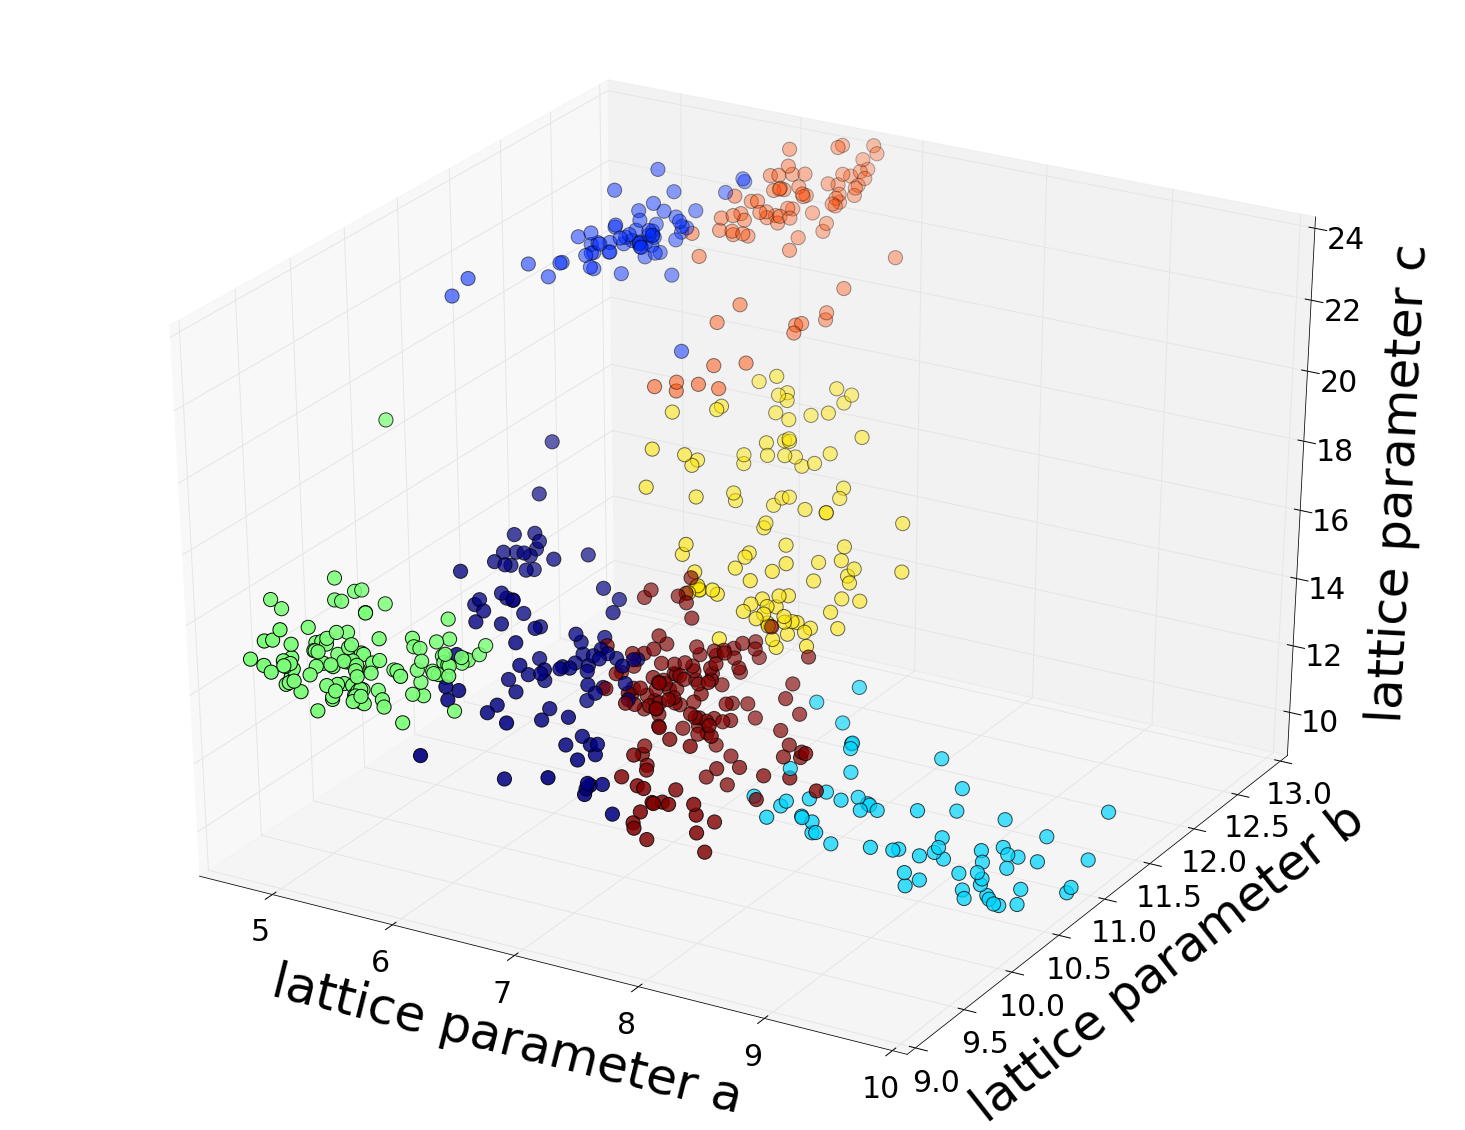

In [85]:
# Energy hierachy data for two different GA runs
tourn50 = get_data("TCS3_Diverse_Energy_Hierarchies/tourn_50cross_hierarchy.txt")
tourn50_clust = get_data("TCS3_Diverse_Energy_Hierarchies/tourn20_50cross_clustlat_hierarchy.txt")

# Going to show example with clustered run, tourn50_clust, can do the same for tourn50 

#Hierarchy Data
name = tourn50_clust
#name = tourn50

# Get List of Descriptors from Common Population
latvol_descriptor = return_lat_vol_descriptor_common_population(name)

# Seperate out lattice parameters for plotting
lattice_params = return_lattice_paramters_common_population(name)
a = [x[0] for x in lattice_params]
b = [x[1] for x in lattice_params]
c = [x[2] for x in lattice_params]

####################### COMMON POOL CLUSTERING AND PLOT ########################

#K-means Clustering on latvol_descriptor, you can modify the number of clusters
# A higher silouette score means better clustering statistically
num_clust= 7 # number of clusters
leng=10 # size of plot

#Perform K-means clustering
model = KMeans(n_clusters=num_clust)
model = model.fit(latvol_descriptor)
silhouette_avg = silhouette_score(np.array(latvol_descriptor), model.labels_)
print("For n_clusters =", num_clust, "The average silhouette_score is :", silhouette_avg)


# Plot
fig = plt.figure(figsize=(26,20))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(a, b, c, c=model.labels_.astype(np.float),s=200) # s controls size of circles in plot
ax.set_xlabel('lattice parameter a',fontsize=50,labelpad=40)
ax.set_ylabel('lattice parameter b',fontsize=50,labelpad=40)
ax.set_zlabel('lattice parameter c',fontsize=50,labelpad=40)
ax.set_xlim3d(4.5, 10.0) # X axis limits                
ax.set_ylim3d(9.0, 13.0)                    
ax.set_zlim3d(9.0, 24.0)
ax.spines['top'].set_linewidth(10)
ax.spines['right'].set_linewidth(10)
ax.spines['bottom'].set_linewidth(10)
ax.spines['left'].set_linewidth(10)
ax.tick_params(axis='both', which='major', labelsize=30,pad=11)
plt.show()

# K means plot of only Initial Pool structures

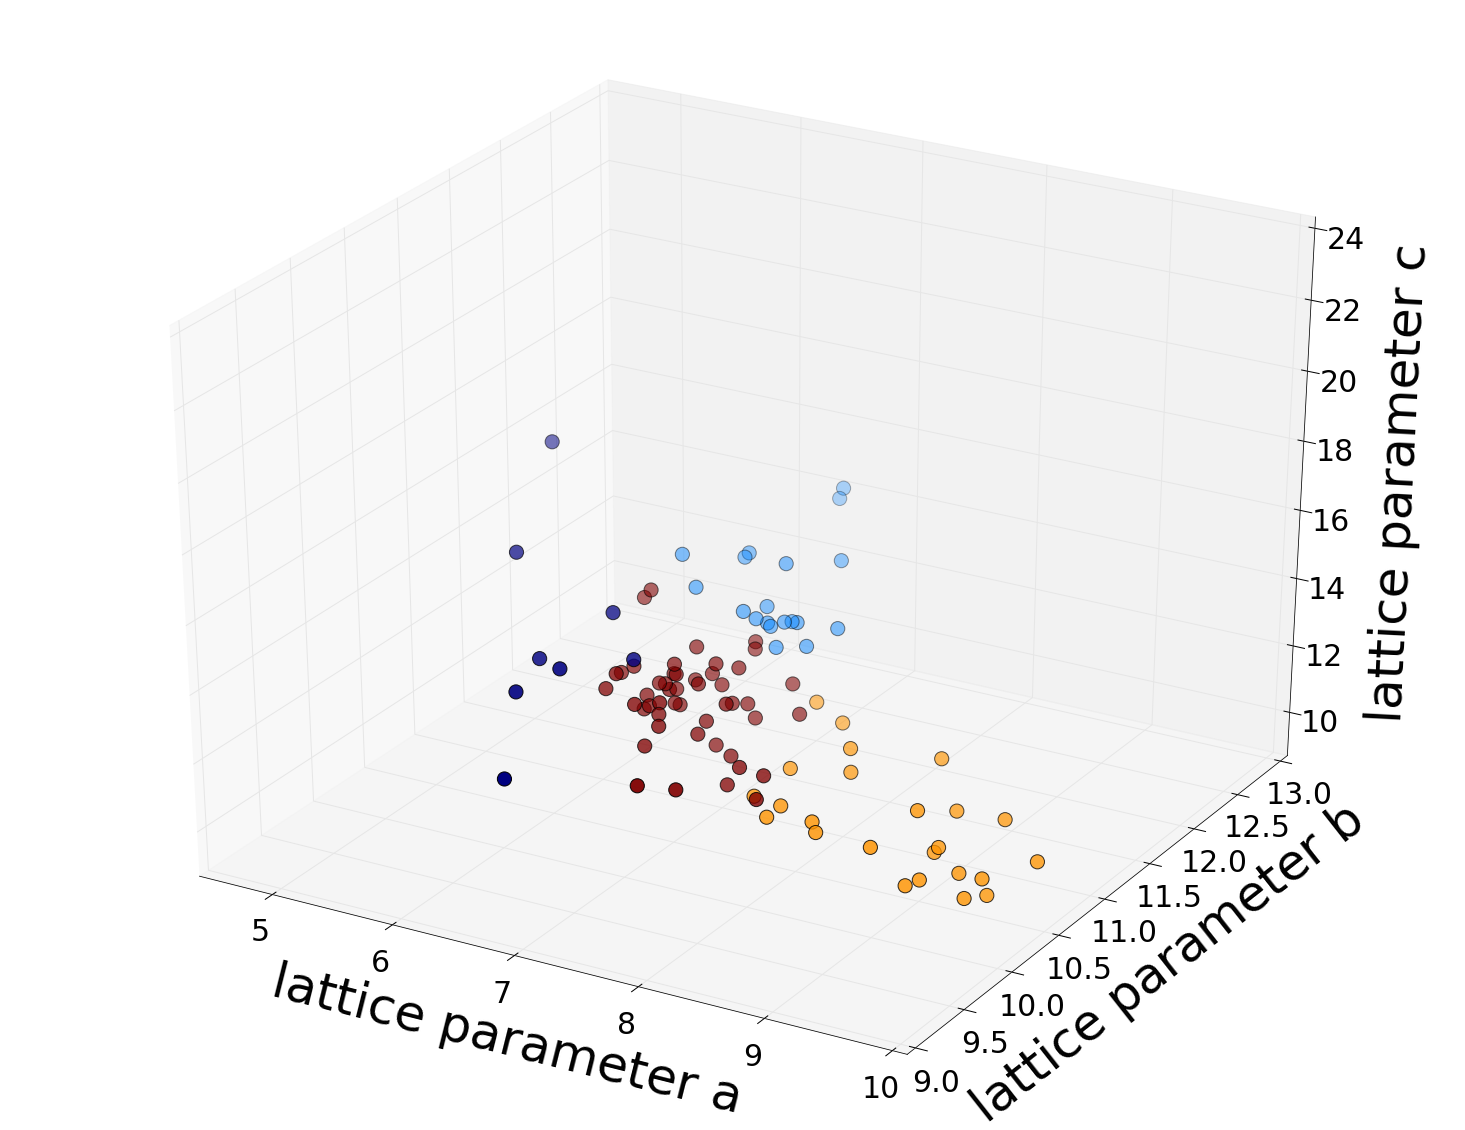

In [82]:
# This just extracts the clustering labels for just the intial pool structure
# While this doesnt reflect necessarily how they would be clustered at runtime,
# It can compare the same group labels (colors) on an even scale

indices= return_initial_pool_indices(name)

IP_labels = np.array([model.labels_[i] for i in indices])
lattice_params_IP = return_lattice_parameters_just_initial_pool(name)
a_IP = [x[0] for x in lattice_params_IP]
b_IP = [x[1] for x in lattice_params_IP]
c_IP = [x[2] for x in lattice_params_IP]

#print IP_labels
#print type(model.labels_)
# Plot
fig = plt.figure(figsize=(26,20))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(a_IP, b_IP, c_IP, c=IP_labels.astype(np.float),s=200) # s controls size of circles in plot
ax.set_xlabel('lattice parameter a',fontsize=50,labelpad=40)
ax.set_ylabel('lattice parameter b',fontsize=50,labelpad=40)
ax.set_zlabel('lattice parameter c',fontsize=50,labelpad=40)
ax.set_xlim3d(4.5, 10.0)                 
ax.set_ylim3d(9.0, 13.0)                    
ax.set_zlim3d(9.0, 24.0) 
ax.spines['top'].set_linewidth(10)
ax.spines['right'].set_linewidth(10)
ax.spines['bottom'].set_linewidth(10)
ax.spines['left'].set_linewidth(10)
ax.tick_params(axis='both', which='major', labelsize=30,pad=11)
plt.show()

# Affinity Propagation Clustering of the initial pool

Estimated number of Affinity Propagation Clusters: 15


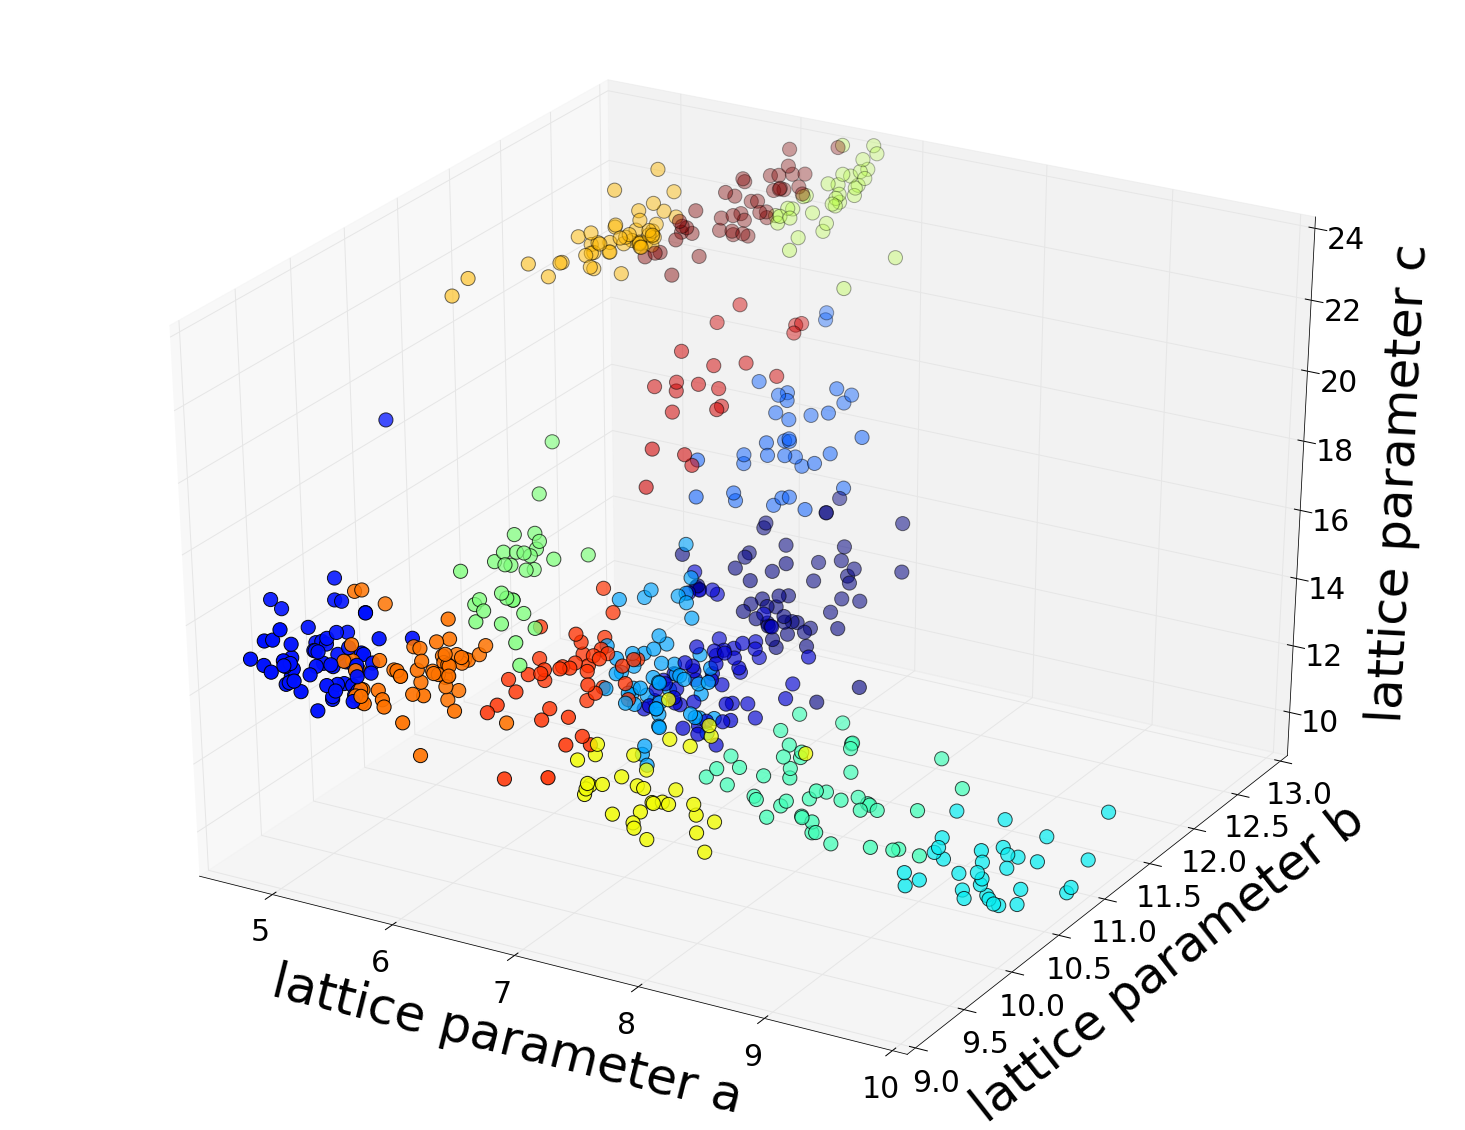

In [83]:
# Clustering Method is now Affinity propagation
af = AffinityPropagation(damping=0.85).fit(latvol_descriptor) # can adjust damping 0.5-1.0, changes cluster size
cluster_centers_indices = af.cluster_centers_indices_
clustered_data = af.labels_
n_clusters_ = len(cluster_centers_indices)
#print str(name)
print('Estimated number of Affinity Propagation Clusters: %d' % n_clusters_)


# Plot Common Population
fig2 = plt.figure(figsize=(26,20))
ax2 = fig2.add_subplot(111, projection='3d')
ax2.scatter(a, b, c, c=af.labels_.astype(np.float),s=200)
ax2.set_xlabel('lattice parameter a',fontsize=50,labelpad=40)
ax2.set_ylabel('lattice parameter b',fontsize=50,labelpad=40)
ax2.set_zlabel('lattice parameter c',fontsize=50,labelpad=40)
ax2.set_xlim3d(4.5, 10.0)                 
ax2.set_ylim3d(9.0, 13.0)                    
ax2.set_zlim3d(9.0, 24.0) 
ax2.spines['top'].set_linewidth(10)
ax2.spines['right'].set_linewidth(10)
ax2.spines['bottom'].set_linewidth(10)
ax2.spines['left'].set_linewidth(10)
ax2.tick_params(axis='both', which='major', labelsize=30,pad=11)
plt.show()

# Plot the initial population

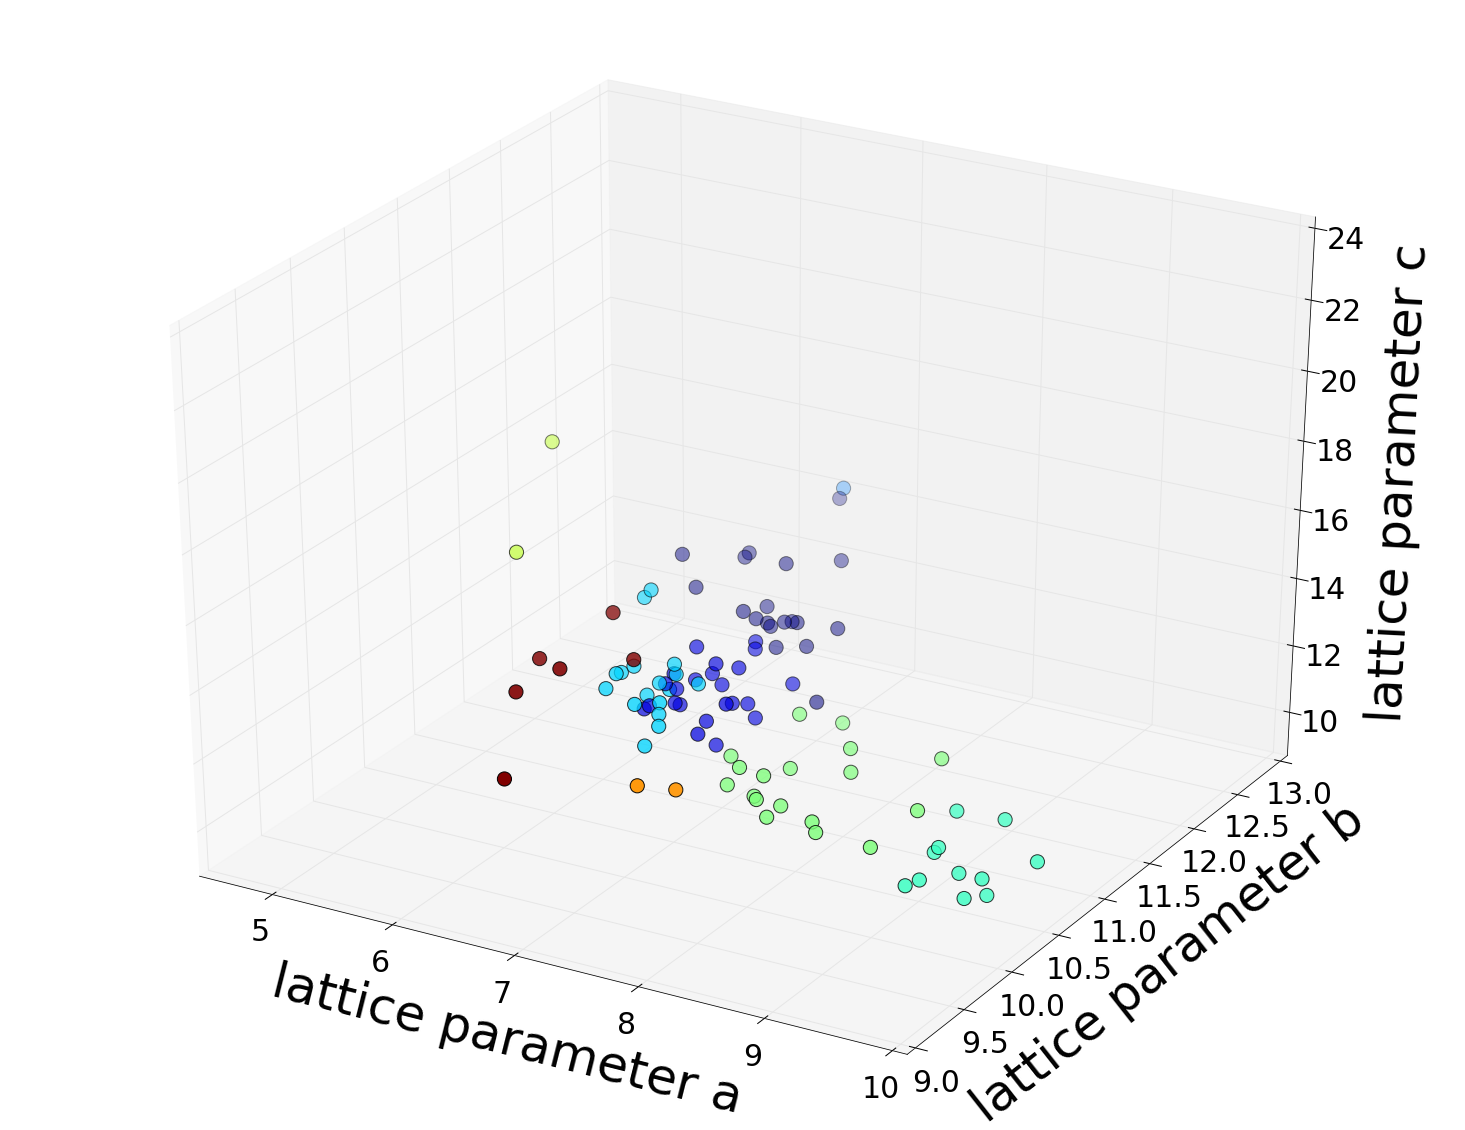

In [84]:
# Extract initial pool data
indices= return_initial_pool_indices(name)
IP_labels = np.array([af.labels_[i] for i in indices])
lattice_params_IP = return_lattice_parameters_just_initial_pool(name)
a_IP = [x[0] for x in lattice_params_IP]
b_IP = [x[1] for x in lattice_params_IP]
c_IP = [x[2] for x in lattice_params_IP]


# Plot just initial pool points
fig = plt.figure(figsize=(26,20))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(a_IP, b_IP, c_IP, c=IP_labels.astype(np.float),s=200) # s controls size of circles in plot
ax.set_xlabel('lattice parameter a',fontsize=50,labelpad=40)
ax.set_ylabel('lattice parameter b',fontsize=50,labelpad=40)
ax.set_zlabel('lattice parameter c',fontsize=50,labelpad=40)
ax.set_xlim3d(4.5, 10.0)                 
ax.set_ylim3d(9.0, 13.0)                    
ax.set_zlim3d(9.0, 24.0) 
ax.spines['top'].set_linewidth(10)
ax.spines['right'].set_linewidth(10)
ax.spines['bottom'].set_linewidth(10)
ax.spines['left'].set_linewidth(10)
ax.tick_params(axis='both', which='major', labelsize=30,pad=11)
plt.show()